In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from cargo_utils import *
import sys
sys.path.append("/Users/peter/Work/")
from XCOM import MassAttenCoef
import cv2
from ZCON import processImage, createMesh, runNewton, calcAttenMat

In [2]:
### Loading Cargo Image Data

im1_raw, im2_raw = loadCargoImage("data/1.npy")
h, l = im1_raw.shape
scale = 100
rhoFe = 7.9

im1_raw = cv2.resize(im1_raw, (l // scale, h // scale))
im2_raw = cv2.resize(im2_raw, (l // scale, h // scale))

im1 = preprocess(im1_raw, "6MeV")
im_H = convertToTransmission(im1)
im_H_seq = convertToCMSteel(im1, "6MeV")

im2 = preprocess(im2_raw, "4MeV")
im_L = convertToTransmission(im2)

h, l = im1.shape
pix = 0.42 * scale

In [3]:
### Loading matrices

b_H = np.load("data/b6MeV.npy")
b_L = np.load("data/b4MeV.npy")
R = np.load("data/R.npy")
E_in = np.load("data/E_in.npy")
E_dep = np.load("data/E_dep.npy")

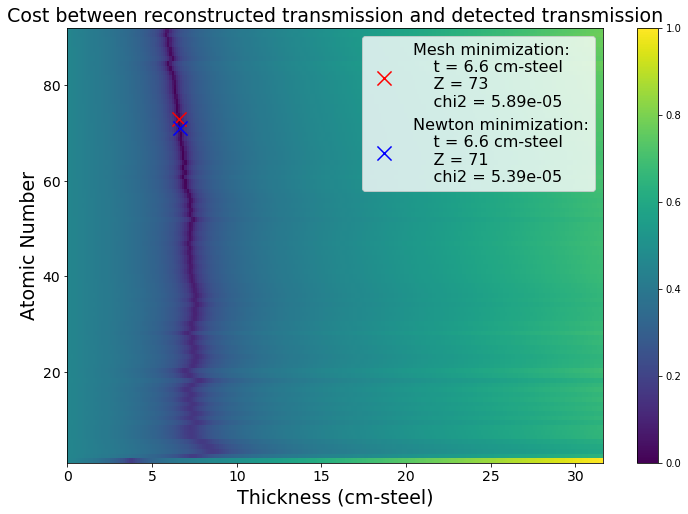

In [7]:
### Plotting mesh

i, j = 2, 2
lmbdaRange, zRange, minima = createMesh(im_H[i,j], im_L[i,j], b_H, b_L, R, E_in, E_dep)

plt.figure(figsize = [12, 8])
extent = [0, 250/rhoFe, 1, 92]
plt.imshow(minima.T, interpolation='nearest', origin='lower', extent = extent, norm=mpl.colors.LogNorm())

idx1, idx2 = np.unravel_index(minima.argmin(), minima.shape)
label = "Mesh minimization:\n    t = %.1f cm-steel\n    Z = %d\n    chi2 = %.2e" \
        % (lmbdaRange[idx1]/rhoFe, zRange[idx2], minima[idx1, idx2])
plt.scatter(lmbdaRange[idx1]/rhoFe, zRange[idx2], color = 'r', marker = 'x', s = 200, label = label)

lmbdas, minima = runNewton(im_H[i,j], im_L[i,j], b_H, b_L, R, E_in, E_dep, calcAttenMat(E_in, zRange), zRange)
idx = np.argmin(minima)
label = "Newton minimization:\n    t = %.1f cm-steel\n    Z = %d\n    chi2 = %.2e" \
        % (lmbdas[idx] / rhoFe, zRange[idx], minima[idx])
plt.scatter(lmbdas[idx] / rhoFe, zRange[idx], color = 'b', marker = 'x', s = 200, label = label)

plt.axis('auto')
plt.xlim([0, 250/rhoFe])
plt.ylim([1, 92])
plt.colorbar()
plt.legend(fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Thickness (cm-steel)", fontsize = 19)
plt.ylabel("Atomic Number", fontsize = 19)
plt.title("Cost between reconstructed transmission and detected transmission", fontsize=19)
#plt.savefig("pixel")

Processing image row 1 of 7...
Processing image row 2 of 7...
Processing image row 3 of 7...
Processing image row 4 of 7...
Processing image row 5 of 7...
Processing image row 6 of 7...
Processing image row 7 of 7...
Completed in 1.90 seconds


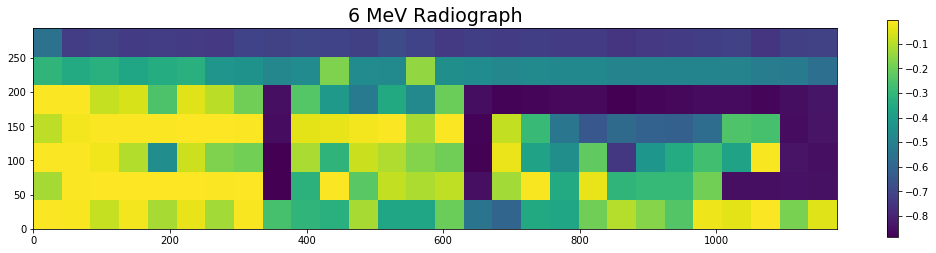

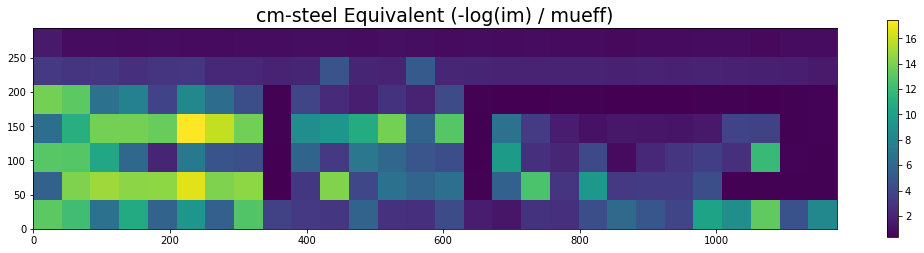

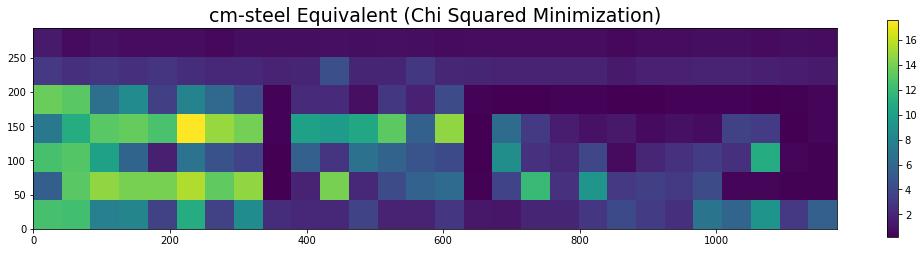

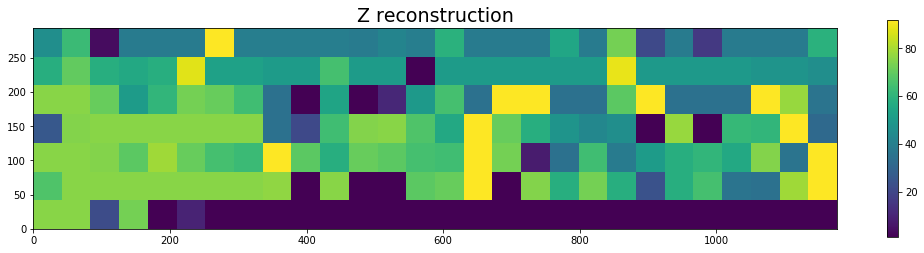

In [8]:
im_lambda, im_Z = processImage(im_H, im_L, b_H, b_L, R, E_in, E_dep)

plt.figure(figsize = [18, 4])
plt.imshow(-im_H, extent = [0, l*pix, 0, h*pix])
plt.title("6 MeV Radiograph", fontsize = 19)
plt.colorbar()

plt.figure(figsize = [18, 4])
plt.imshow(im_H_seq, extent = [0, l*pix, 0, h*pix])
plt.title("cm-steel Equivalent (-log(im) / mueff)", fontsize = 19)
plt.colorbar()

plt.figure(figsize = [18, 4])
plt.imshow(im_lambda/rhoFe, extent = [0, l*pix, 0, h*pix])
plt.title("cm-steel Equivalent (Chi Squared Minimization)", fontsize = 19)
plt.colorbar()

plt.figure(figsize = [18, 4])
plt.imshow(im_Z, extent = [0, l*pix, 0, h*pix])
plt.title("Z reconstruction", fontsize = 19)
plt.colorbar()